In [7]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.style.use("default")

In [8]:
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):

    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1
    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim((-0.05, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()

**Равномерное непрерывное распределение**

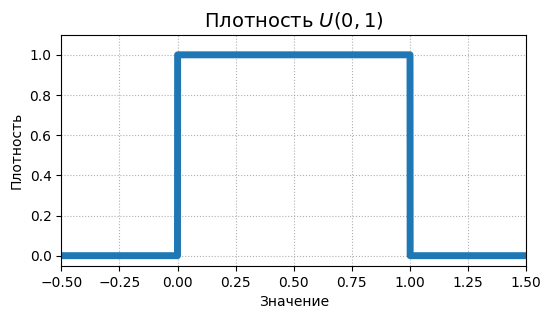

In [9]:
show_pdf(pdf=sts.uniform.pdf, xmin=-0.5, xmax=1.5, grid_size=10000, distr_name=r'$U(0, 1)$', loc=0, scale=1)

In [10]:
# создать виджет, но не отображать его
ip = widgets.interactive(
show_pdf,
pdf=widgets.fixed(sts.uniform.pdf),
grid_size=widgets.IntSlider(min=25, max=300, step=25,
value=100, description='$grid\_size$'),
xmin=widgets.FloatSlider(min=-1, max=10, step=0.1,
value=1, description='$x_{min}=$'),
xmax=widgets.FloatSlider(min=1, max=20, step=0.1,
value=10, description='$x_{max}=$'),
loc=widgets.FloatSlider(min=1, max=15, step=0.1,
value=3, description='$a=$'),
scale=widgets.FloatSlider(min=0.5, max=10, step=0.01,
value=1, description='$b - a=$'),
distr_name=r'$U$({loc:.2f}, {loc:.2f} + {scale:.2f})',
);
# отображаем слайдеры группами
display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update() #чтобы функция запустилась до первого изменения слайдеров

In [11]:
def plot_uniform(a=0, b=1, n_points=1000):
    """
    отрисовывает распределение случайных точек по равномерному непрерывнс
    a, b - начало и конец отрезка
    n_points - число наблюдений в выборке
    """
    plt.figure(figsize=(6, 3))
    sample = sts.uniform.rvs(loc=a, scale=b-a, size=n_points) # генерация вы
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(a-(b-a)/6, b + (b-a)/6 , n_points) # сетка для постр
    plt.plot(grid, sts.uniform.pdf(grid, a, b-a), color='red', lw=3, label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim \mathcal{R}$(а, b)', fontsize=14)
    plt.legend(fontsize=10, loc=8)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)},a по формуле: {round((a + b)/ 2, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)},a по формуле: {round((b - a) ** 2/ 12, 3)}')

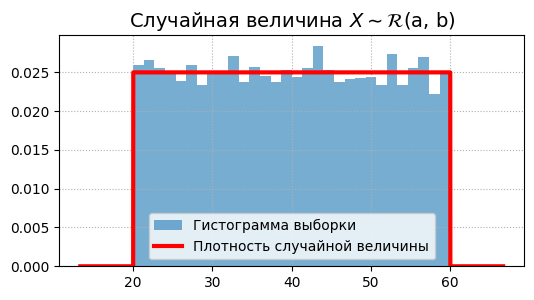

Математическое ожидание: 39.91,a по формуле: 40.0
Дисперсия: 133.234,a по формуле: 133.333


In [12]:
plot_uniform(20, 60, 10000)

**Экспоненциальное распределение**

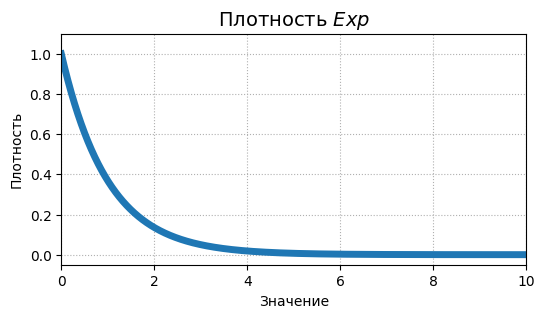

In [13]:
show_pdf(pdf=sts.expon.pdf, xmin=0, xmax=10, grid_size=10000, distr_name=r'$Exp$', scale=1)

In [14]:
# создать виджет, но не отображать его
ip = widgets.interactive(
show_pdf,
pdf=widgets.fixed(sts.expon.pdf),
grid_size=widgets.IntSlider(min=25, max=300, step=25,
value=100, description='$grid\_size$'),
xmin=widgets.FloatSlider(min=0, max=20, step=0.1,
value=0, description='$x_{min}=$'),
xmax=widgets.FloatSlider(min=1, max=20, step=0.1,
value=10, description='$x_{max}=$'),
scale=widgets.FloatSlider(min=0, max=5, step=0.1,
value=1, description='$1 / \lambda=$'),
distr_name=r'$Exp$({scale:.2f})',
);
# отображаем слайдеры группами
display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update() # чтобы функция запустилась до первого изменения слайдеров

In [15]:
def plot_exp(lmbd=1, n_points=10000):
    plt.figure(figsize=(6, 3))
    sample = sts.expon.rvs(scale=1/lmbd, size=n_points) # генерация выборки р
    plt.hist(sample, bins=30, density=True, alpha=0.6,
    label='Гистограмма выборки')
    grid = np.linspace(0, 10, n_points) # сетка для построения графика
    plt.plot(grid, sts.expon.pdf(grid, scale=1/lmbd), color='red',
    lw=3, label='Плотность случайной величины')
    plt.title(r'Exponential ', fontsize=14)
    plt.legend(fontsize=10, loc=0)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, a по формуле: {round(lmbd, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, a по формуле: {round(lmbd**2, 3)}')

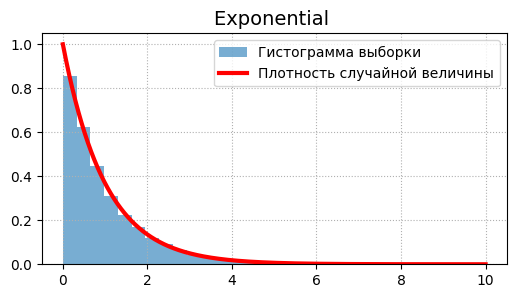

Математическое ожидание: 1.002, a по формуле: 1
Дисперсия: 1.021, a по формуле: 1


In [16]:
plot_exp()

**Нормальное распределение**

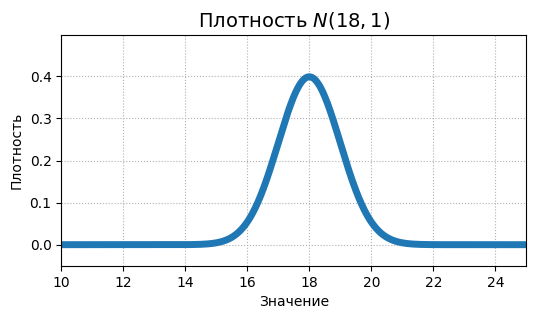

In [17]:
show_pdf(pdf=sts.norm.pdf, xmin=10, xmax=25, grid_size=10000, distr_name=r'$N(18, 1)$', loc=18, scale=1)

In [18]:
# создать виджет, но не отображать его
ip = widgets.interactive(
show_pdf,
pdf=widgets.fixed(sts.norm.pdf),
grid_size=widgets. IntSlider(min=25, max=300, step=25,
value=100, description='$grid\_size$'),
xmin=widgets.FloatSlider(min=-1, max=10, step=0.1,
value=0, description='$x_{min}=$'),
xmax=widgets.FloatSlider(min=5, max=25, step=0.1,
value=15, description='$x_{max}=$'),
loc = widgets.FloatSlider(min=-1, max=25, step=0.1,
value=10, description='$a=$'),
scale = widgets.FloatSlider(min=0.01, max=10, step=0.01,
value=1, description='$\sigma=$'),
distr_name = r'$N$({loc:.2f}, {scale:.2f})'
);
# отображаем слайдеры группами
display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update() # чтобы функция запустилась до первого изменения слайдеров

In [19]:
def plot_norm(a=0, sigma=1, n_points=10000):
    plt.figure(figsize=(6, 3))
    sample = sts.norm.rvs(loc=a, scale=sigma,
    size=n_points) # генерация выборки размера n_points
    plt.hist(sample, bins=30, density=True,
    alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points) # сетка для nо
    plt.plot(grid, sts.norm.pdf(grid, a, sigma), color='red',
    lw=3, label='Плотность случайной величины')
    plt.title(r'Нормальная величина $X \sim \mathcal{N}$', fontsize=10)
    plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, a по формуле: {round(a, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(sigma ** 2, 3)}')

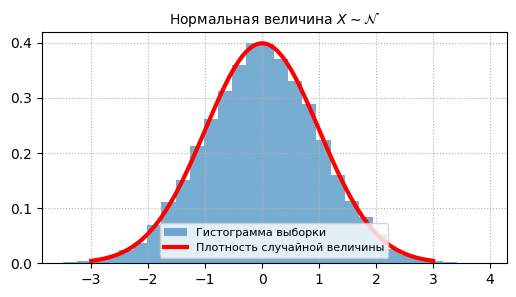

Математическое ожидание: -0.001, a по формуле: 0
Дисперсия: 1.016, а по формуле: 1


In [20]:
plot_norm()

**Логнормальное распределение**

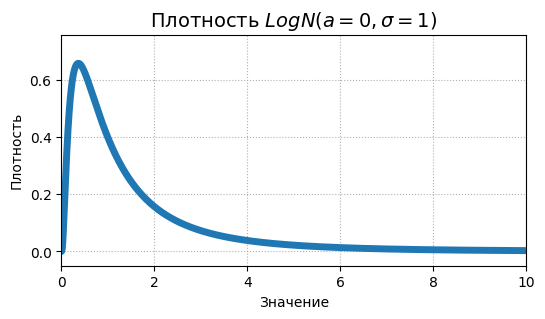

In [21]:
show_pdf(pdf=sts.lognorm.pdf, xmin=0, xmax=10, grid_size=10000, distr_name=r'$LogN(a=0, \sigma=1)$', s=1, scale=np.exp(0))

In [22]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.lognorm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100, description='$grid\_size$'),
    xmin=widgets.FloatSlider(min=0.00, max=1, step=0.01, value=0.00, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=2, max=20, step=0.5, value=10, description='$x_{max}=$'),
    s=widgets.FloatSlider(min=0.125, max=10, step=0.125, value=1, description='$\sigma=$'),
    scale=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1, description=r'$e^{a}$'),
    distr_name=r'$LogN(a=\ln({scale:.3f}),\ \sigma={s:.3f})$'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update()


In [23]:
def plot_lognorm(a=0, sigma=1, n_points=10000):
    plt.figure(figsize=(6, 3))
    sample = sts.lognorm.rvs(s=sigma, scale=np.exp(a), size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(0.01, np.percentile(sample, 99.5), n_points)
    plt.plot(grid, sts.lognorm.pdf(grid, s=sigma, scale=np.exp(a)), color='red', lw=3, label='Плотность случайной величины')
    plt.title(r'Логнормальная величина $X \sim LogN(a, \sigma)$', fontsize=12)
    plt.legend(fontsize=9)
    plt.grid(ls=':')
    plt.show()
    mean_theory = np.exp(a + sigma ** 2 / 2)
    var_theory = np.exp(2 * a + sigma ** 2) * (np.exp(sigma ** 2) - 1)
    print(f'Математическое ожидание: {sample.mean():.3f},а по формуле: {mean_theory:.3f}')
    print(f'Дисперсия: {sample.var():.3f},а по формуле: {var_theory:.3f}')


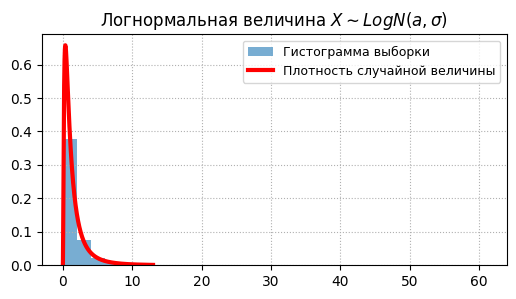

Математическое ожидание: 1.639,а по формуле: 1.649
Дисперсия: 4.639,а по формуле: 4.671


In [24]:
plot_lognorm()